In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Asegúrate de tener seaborn instalado

# Configuración técnica
plt.rcParams['figure.figsize'] = (12, 6)

# Definimos rutas
path_scored = '../data/processed/df_maestro_unificado_scored.csv'
path_base = '../data/processed/df_maestro_unificado.csv'

try:
    df = pd.read_csv(path_scored)
    print(" Dataset con Scoring e IA cargado correctamente.")
except FileNotFoundError:
    df = pd.read_csv(path_base)
    print(" Cargado dataset base. (Faltan columnas de Risk_Score y Cluster_AI)")

# Inspección de columnas disponibles
print(f"\nTotal de registros: {len(df)}")
print("-" * 30)
print("Columnas detectadas en la tabla:")
for col in df.columns:
    print(f"  - {col}")

 Dataset con Scoring e IA cargado correctamente.

Total de registros: 11600
------------------------------
Columnas detectadas en la tabla:
  - ID_Actividad
  - ID_Usuario
  - Fecha_Actividad
  - Tipo_Evento
  - Duracion_Minutos
  - ID_Contenido
  - Edad
  - Genero
  - Nivel_Fitness
  - Fuente_Registro
  - Ciudad
  - ID_Suscripcion
  - Fecha_Inicio
  - Estado_Suscripcion
  - Costo_Suscripcion_USD
  - Metodo_Pago
  - Interacciones_Nutricion
  - Dias_Inactivo
  - En_Riesgo
  - Tipo_Plan
  - Porcentaje_Completado
  - score_inactividad
  - score_progreso
  - Risk_Score
  - Segmento_Riesgo
  - Cluster_AI


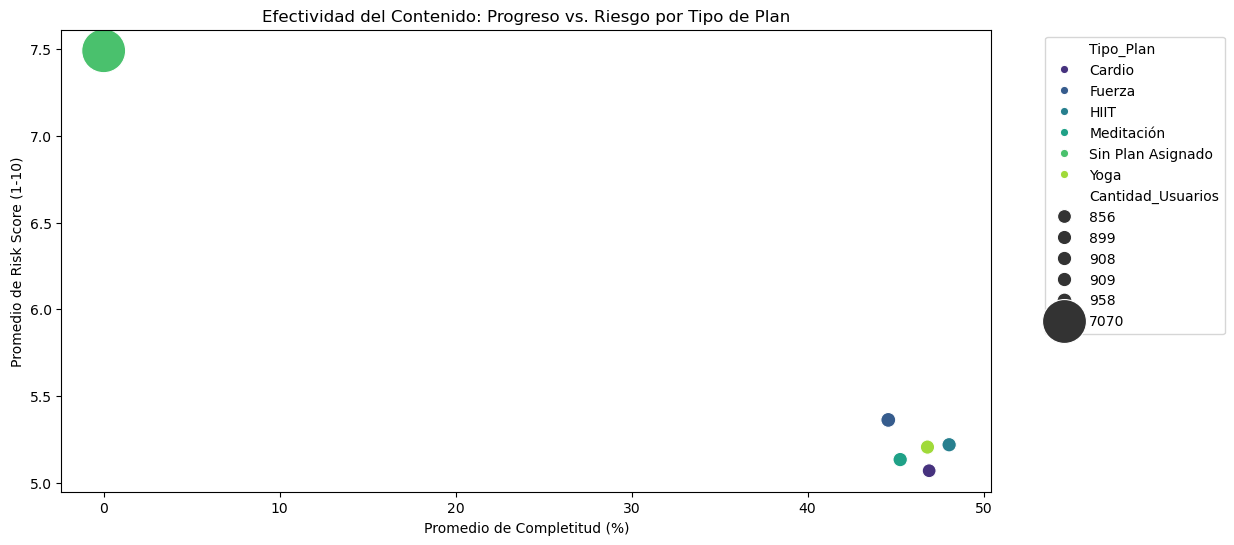

           Tipo_Plan  Porcentaje_Completado  Risk_Score  Cantidad_Usuarios  \
0             Cardio              46.910047    5.068209                856   
2               HIIT              48.046256    5.218078                908   
5               Yoga              46.815350    5.204572                899   
3         Meditación              45.265127    5.132512                909   
1             Fuerza              44.588727    5.361321                958   
4  Sin Plan Asignado               0.000000    7.491205               7070   

   Indice_Efectividad  
0            9.255744  
2            9.207653  
5            8.995043  
3            8.819293  
1            8.316743  
4            0.000000  


In [2]:
# 1. Agrupamos por Tipo de Plan para ver métricas de éxito
analisis_planes = df.groupby('Tipo_Plan', observed=True).agg({
    'Porcentaje_Completado': 'mean',
    'Risk_Score': 'mean',
    'ID_Usuario': 'count'
}).rename(columns={'ID_Usuario': 'Cantidad_Usuarios'}).reset_index()

# 2. Creamos un índice de "Efectividad" 
# (A mayor completitud y menor riesgo, mejor es el plan)
analisis_planes['Indice_Efectividad'] = analisis_planes['Porcentaje_Completado'] / analisis_planes['Risk_Score']

# 3. Visualización: Relación entre Progreso y Riesgo por Plan
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=analisis_planes, 
    x='Porcentaje_Completado', 
    y='Risk_Score', 
    size='Cantidad_Usuarios', 
    hue='Tipo_Plan',
    sizes=(100, 1000),
    palette='viridis'
)

plt.title('Efectividad del Contenido: Progreso vs. Riesgo por Tipo de Plan')
plt.xlabel('Promedio de Completitud (%)')
plt.ylabel('Promedio de Risk Score (1-10)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(analisis_planes.sort_values(by='Indice_Efectividad', ascending=False))